## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import time
import datetime
import tweepy
import json
import requests
import warnings

In [3]:
df=pd.read_csv('twitter-archive-enhanced.csv')
df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

#### First Dataset  (twitter_archive_enhanced)

#### Second Dataset From Image Predictions

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
file_url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(file_url)

open('image_predictions.tsv', 'wb').write(response.content)

335079

In [5]:

df1 = pd.read_csv('image_predictions.tsv',sep='\t')
df1

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

#### Third Dataset From Image Predictions

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#Connect to twitter API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True)
tweet_ids = df['tweet_id'].values
len(tweet_ids)

2356

In [7]:
#Download Tweepy status object based on Tweet ID and
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in df['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [8]:
#Printing 
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2327
The list of tweets no found 29


In [9]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [10]:
with open('tweet_json.txt', 'w', encoding='utf-8') as f:
    json.dump(my_list_of_dicts, f, ensure_ascii=False, indent=4)

In [11]:

with open('tweet_json.txt', encoding='utf-8')as file:
     tweet_data = json.load(file)


In [12]:
tweet_data

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},
      'large': {'w': 540, 'h': 528, 

In [13]:
#create a list of dictionary for tweet_json
tweet_json=[]
for i in tweet_data:
    tweet_id = i['id_str'] 
    retweet_count = i['retweet_count']
    favorite_count = i['favorite_count']
    source=i['source']
    

    tweet_json.append({'tweet_id': str(tweet_id),
                       'retweet_count':(retweet_count),
                       'favorite_count':(favorite_count),
                        'source':(source)})

In [14]:
tweet_json

[{'tweet_id': '892420643555336193',
  'retweet_count': 6987,
  'favorite_count': 33769,
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'},
 {'tweet_id': '892177421306343426',
  'retweet_count': 5290,
  'favorite_count': 29288,
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'},
 {'tweet_id': '891815181378084864',
  'retweet_count': 3468,
  'favorite_count': 22024,
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'},
 {'tweet_id': '891689557279858688',
  'retweet_count': 7213,
  'favorite_count': 36881,
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'},
 {'tweet_id': '891327558926688256',
  'retweet_count': 7739,
  'favorite_count': 35258,
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'},
 {'tweet_id': '891087950875897856',
  'retweet_count': 2594,
  'f

In [15]:
tweet_count = pd.DataFrame(tweet_json, columns = ['tweet_id', 'retweet_count', 'favorite_count','source'])
tweet_count.head(5)

tweet_id  retweet_count  favorite_count  \
0  892420643555336193           6987           33769   
1  892177421306343426           5290           29288   
2  891815181378084864           3468           22024   
3  891689557279858688           7213           36881   
4  891327558926688256           7739           35258   

                                              source  
0  <a href="http://twitter.com/download/iphone" r...  
1  <a href="http://twitter.com/download/iphone" r...  
2  <a href="http://twitter.com/download/iphone" r...  
3  <a href="http://twitter.com/download/iphone" r...  
4  <a href="http://twitter.com/download/iphone" r...

## Assessing Data
Visual Assessment of the three DataFrames

In [16]:
#twitter-archive-enhanced dataframe
df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [17]:
df1

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [18]:
tweet_count

tweet_id  retweet_count  favorite_count  \
0     892420643555336193           6987           33769   
1     892177421306343426           5290           29288   
2     891815181378084864           3468           22024   
3     891689557279858688           7213           36881   
4     891327558926688256           7739           35258   
5     891087950875897856           2594           17779   
6     890971913173991426           1653           10348   
7     890729181411237888          15721           56783   
8     890609185150312448           3612           24485   
9     890240255349198849           6084           27910   
10    890006608113172480           6135           26999   
11    889880896479866881           4151           24536   
12    889665388333682689           8330           41990   
13    889638837579907072           3706           23629   
14    889531135344209921           1876           13342   
15    889278841981685760           4434           22087   
16    888917238123831296           3755           25595   
17    888804989199671297           3523           22441   
18    888554962724278272           2871           17292   
19    888078434458587136           2890           19129   
20    887705289381826560           4528           26581   
21    887517139158093824           9831           40663   
22    887473957103951883          14992           60100   
23    887343217045368832           8795           29554   
24    887101392804085760           4976           26937   
25    886983233522544640           6300           30326   
26    886736880519319552           2623           10488   
27    886680336477933568           3725           19702   
28    886366144734445568           2626           18525   
29    886267009285017600              4             105   
...                  ...            ...             ...   
2297  666411507551481857            262             371   
2298  666407126856765440             30              93   
2299  666396247373291520             69             147   
2300  666373753744588802             73             163   
2301  666362758909284353            468             649   
2302  666353288456101888             58             179   
2303  666345417576210432            123             244   
2304  666337882303524864             79             168   
2305  666293911632134144            289             425   
2306  666287406224695296             57             123   
2307  666273097616637952             67             151   
2308  666268910803644416             38             100   
2309  666104133288665088           5473           12878   
2310  666102155909144576             11              66   
2311  666099513787052032             53             134   
2312  666094000022159362             63             142   
2313  666082916733198337             37              92   
2314  666073100786774016            131             274   
2315  666071193221509120             51             127   
2316  666063827256086533            180             397   
2317  666058600524156928             47              99   
2318  666057090499244032            112             248   
2319  666055525042405380            196             367   
2320  666051853826850816            701            1026   
2321  666050758794694657             50             115   
2322  666049248165822465             36              88   
2323  666044226329800704            115             247   
2324  666033412701032449             36             100   
2325  666029285002620928             39             112   
2326  666020888022790149            422            2288   

                                                 source  
0     <a href="http://twitter.com/download/iphone" r...  
1     <a href="http://twitter.com/download/iphone" r...  
2     <a href="http://twitter.com/download/iphone" r...  
3     <a href="http://twitter.com/download/iphone" r...  
4     <a href="http://twitter.com/download/iphone" r...  
5     <a 

### Programmatic Assessment

In [19]:
#for twitter-archived-enhance Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
source            2327 non-null object
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


In [22]:
df.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
506   812747805718642688                    NaN                  NaN   
1906  674468880899788800                    NaN                  NaN   
1852  675707330206547968           6.754971e+17         4.196984e+09   
1420  698262614669991936                    NaN                  NaN   
293   837820167694528512                    NaN                  NaN   

                      timestamp  \
506   2016-12-24 19:52:31 +0000   
1906  2015-12-09 06:01:26 +0000   
1852  2015-12-12 16:02:36 +0000   
1420  2016-02-12 21:49:15 +0000   
293   2017-03-04 00:21:08 +0000   

                                                 source  \
506   <a href="http://twitter.com/download/iphone" r...   
1906  <a href="http://twitter.com/download/iphone" r...   
1852  <a href="http://twitter.com/download/iphone" r...   
1420  <a href="http://twitter.com/download/iphone" r...   
293   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
506   RT @dog_rates: Meet Sammy. At first I was like...         6.800555e+17   
1906  This is Louis. He thinks he's flying. 13/10 th...                  NaN   
1852  We've got ourselves a battle here. Watch out R...                  NaN   
1420  This is Franklin. He's a yoga master. Trying t...                  NaN   
293   Here's a pupper before and after being asked "...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
506               4.196984e+09  2015-12-24 16:00:30 +0000   
1906                       NaN                        NaN   
1852                       NaN                        NaN   
1420                       NaN                        NaN   
293                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
506   https://twitter.com/dog_rates/status/680055455...                10   
1906  https://twitter.com/dog_rates/status/674468880...                13   
1852  https://twitter.com/dog_rates/status/675707330...                11   
1420  https://twitter.com/dog_rates/status/698262614...                11   
293   https://twitter.com/dog_rates/status/837820167...                12   

      rating_denominator      name doggo floofer  pupper puppo  
506                   10     Sammy  None    None    None  None  
1906                  10     Louis  None    None    None  None  
1852                  10      None  None    None    None  None  
1420                  10  Franklin  None    None    None  None  
293                   10      None  None    None  pupper  None

In [23]:
df1.sample(5)

tweet_id                                          jpg_url  \
511   676191832485810177  https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg   
861   697242256848379904  https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg   
265   670803562457407488  https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg   
22    666337882303524864  https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
1031  711363825979756544  https://pbs.twimg.com/media/Cd9Fn5QUMAAYMT4.jpg   

      img_num         p1   p1_conf  p1_dog                 p2   p2_conf  \
511         2  Chihuahua  0.376741    True  Italian_greyhound  0.173114   
861         1   grey_fox  0.236031   False        Siamese_cat  0.165791   
265         1    basenji  0.344101    True       Ibizan_hound  0.210282   
22          1         ox  0.416669   False       Newfoundland  0.278407   
1031        1   Pembroke  0.750906    True           Cardigan  0.241152   

      p2_dog           p3   p3_conf  p3_dog  
511     True       muzzle  0.071485   False  
861    False   Eskimo_dog  0.063533    True  
265     True  toy_terrier  0.196279    True  
22      True  groenendael  0.102643    True  
1031    True      basenji  0.002640    True

In [24]:
tweet_count.sample(5)

tweet_id  retweet_count  favorite_count  \
2088  670421925039075328            551            1145   
1182  715680795826982913           1446            3972   
845   761672994376806400          26704           46233   
810   768473857036525572           3154           12763   
624   793180763617361921           1862            6557   

                                                 source  
2088  <a href="http://twitter.com/download/iphone" r...  
1182  <a href="http://twitter.com/download/iphone" r...  
845   <a href="http://twitter.com/download/iphone" r...  
810   <a href="http://twitter.com/download/iphone" r...  
624   <a href="http://twitter.com/download/iphone" r...

In [25]:
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [26]:
df1.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [27]:
tweet_count.describe()

retweet_count  favorite_count
count    2327.000000     2327.000000
mean     2465.791147     7043.304684
std      4175.638727    10945.626979
min         1.000000        0.000000
25%       493.500000     1222.500000
50%      1148.000000     3046.000000
75%      2853.500000     8586.000000
max     70563.000000   144643.000000

In [28]:
df['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Daisy           7
an              7
Toby            7
Buddy           7
Bailey          7
Koda            6
Jax             6
Stanley         6
Scout           6
Leo             6
Oscar           6
Milo            6
Bella           6
Rusty           6
Dave            6
Jack            6
Alfie           5
             ... 
Monty           1
Kaiya           1
Cheryl          1
Harrison        1
Marvin          1
Zooey           1
Major           1
Joshwa          1
Norman          1
Mutt            1
Furzey          1
Torque          1
Ziva            1
Gòrdón          1
Andru           1
Rumpole         1
Mojo            1
Jaycob          1
Bloo            1
Samsom          1
Mary            1
Emmie           1
Sage            1
Godzilla        1
Arlen     

In [29]:
df1['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
malinois                           20
toy_terrier                        20
Samoyed                            20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [30]:
tweet_count['retweet_count'].value_counts()

50      6
407     5
209     5
855     5
717     4
551     4
557     4
477     4
653     4
627     4
1862    4
104     4
2419    4
1044    4
346     4
251     4
1513    4
2922    4
521     4
110     4
965     4
465     4
326     4
5722    4
569     4
133     3
219     3
5265    3
246     3
406     3
       ..
4573    1
479     1
2528    1
481     1
485     1
8679    1
489     1
2538    1
2480    1
2476    1
2410    1
2468    1
363     1
365     1
367     1
2416    1
369     1
2418    1
3001    1
8577    1
393     1
2442    1
2452    1
388     1
411     1
2460    1
413     1
415     1
2466    1
27      1
Name: retweet_count, Length: 1654, dtype: int64

### QUALITY ISSUES
1.Missing data in the following columns:in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, expanded_urls . ▪ tweet_id is an int (applies to all tables)

2.Dog names: some dogs have 'None' as a name, or 'a', or 'an 
3.Accuracy:retweeted_status_timestamp is also an object (the other
retweeted statuses are floats)
 Time-stamp is an object,change wrong datatypes of values in colums like
 
4 Consistency: ,rating_denominator should be a standard 10, but there are a multitude of other values

5.Validity: p1, p2 and p3 columns have invalid data...why would the
algorithm labelled a dog photo as a starfish, boathouse, or
mailbox.

6.Consistency: The Source column still has the HTML tags

7.Consistency:p1, p2 and p3 columns aren't consistent when it comes to
capitalization: sometimes the dog breed listed is all lowercase,
sometimes it is written in Sentence Case.

8.This data-set includes retweets, which means there is duplicated data (as a result, these columns will be empty: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp).



### TIDINESS ISSUES

1.The last four columns all relate to the same variable (dogoo, floofer,
pupper, puppo).Created a new column  for them(dog_type).

2.This data set is part of the same observational unit as the data in the
‘twitter-archive-enhanced-2.csv’ - one table with all basic information
about the dog ratings

## Cleaning Data


In [31]:
# Make copies of original pieces of data
df_clean = df.copy()
df1_clean = df1.copy()
tweet_count_clean = tweet_count.copy()

### Concatenating the three Datasets Together

In [32]:
df_clean = pd.concat([df_clean, df1_clean, tweet_count_clean], join='outer', axis=1)

### Issue 1:

### Define

This data-set includes retweets, which means there is duplicated data (as a result, these columns will be empty: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp).

In [33]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_user_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_timestamp.isnull()]

### Code

In [34]:
selected_columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
df_clean.drop(selected_columns,axis='columns',inplace=True)

## Issue #2:

#### Define:
Checking and dropping null values

#### Code

In [35]:
df_clean.isnull()

tweet_id  timestamp  source   text  expanded_urls  rating_numerator  \
0        False      False   False  False          False             False   
1        False      False   False  False          False             False   
2        False      False   False  False          False             False   
3        False      False   False  False          False             False   
4        False      False   False  False          False             False   
5        False      False   False  False          False             False   
6        False      False   False  False          False             False   
7        False      False   False  False          False             False   
8        False      False   False  False          False             False   
9        False      False   False  False          False             False   
10       False      False   False  False          False             False   
11       False      False   False  False          False             False   
12       False      False   False  False          False             False   
13       False      False   False  False          False             False   
14       False      False   False  False          False             False   
15       False      False   False  False          False             False   
16       False      False   False  False          False             False   
17       False      False   False  False          False             False   
18       False      False   False  False          False             False   
20       False      False   False  False          False             False   
21       False      False   False  False          False             False   
22       False      False   False  False          False             False   
23       False      False   False  False          False             False   
24       False      False   False  False          False             False   
25       False      False   False  False          False             False   
26       False      False   False  False          False             False   
27       False      False   False  False          False             False   
28       False      False   False  False          False             False   
29       False      False   False  False          False             False   
30       False      False   False  False           True             False   
...        ...        ...     ...    ...            ...               ...   
2326     False      False   False  False          False             False   
2327     False      False   False  False          False             False   
2328     False      False   False  False          False             False   
2329     False      False   False  False          False             False   
2330     False      False   False  False          False             False   
2331     False      False   False  False          False             False   
2332     False      False   False  False          False             False   
2333     False      False   False  False          False             False   
2334     False      False   False  False          False             False   
2335     False      False   False  False          False             False   
2336     False      False   False  False          False             False   
2337     False      False   False  False          False             False   
2338     False      False   False  False          False             False   
2339     False      False   False  False          False             False   
2340     False      False   False  False          False             False   
2341     False      False   False  False          False             False   
2342     False      False   False  False          False             False   
2343     False      False   False  False          False             False   
2344     False      False   False  False          False             False   
2345     False      False   False  False          False             False   
23

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
tweet_id              1896 non-null float64
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-n

In [37]:
df_clean.dropna(how='any',inplace=True)

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id              1841 non-null int64
timestamp             1841 non-null object
source                1841 non-null object
text                  1841 non-null object
expanded_urls         1841 non-null object
rating_numerator      1841 non-null int64
rating_denominator    1841 non-null int64
name                  1841 non-null object
doggo                 1841 non-null object
floofer               1841 non-null object
pupper                1841 non-null object
puppo                 1841 non-null object
tweet_id              1841 non-null float64
jpg_url               1841 non-null object
img_num               1841 non-null float64
p1                    1841 non-null object
p1_conf               1841 non-null float64
p1_dog                1841 non-null object
p2                    1841 non-null object
p2_conf               1841 non-null float64
p2_dog                1841 non-n

#### Test


In [39]:
df_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer  \
0                  10   Phineas  None    None   
1                  10     Tilly  None    None   
2                  10    Archie  None    None   
3                  10     Darla  None    None   
4                  10  Franklin  None    None   

                         ...                                          p2  \
0                        ...                                      collie   
1                        ...                          miniature_pinscher   
2                        ...                                    malinois   
3                        ...                                     redbone   
4                        ...                                  Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf p3_dog            tweet_id  \
0  0.156665    True    Shetland_sheepdog  0.061428   True  892420643555336193   
1  0.074192    True  Rhodesian_ridgeback  0.072010   True  892177421306343426   
2  0.138584    True           bloodhound  0.116197   True  891815181378084864   
3  0.360687    True   miniature_pinscher  0.222752   True  891689557279858688   
4  0.243682    True             Doberman  0.154629   True  891327558926688256   

  retweet_count favorite_count  \
0        6987.0        33769.0   
1        5290.0        29288.0   
2        3468.0        22024.0   
3        7213.0        36881.0   
4        7739.0        35258.0   

                                              source  
0  <a href="http://twitter.com/download/iphone" r...  
1  <a href="http://twitter.com/download/iphone" r...  
2  <a href="http://twitter.com/download/iphone" r...  
3  <a href="http://twitter.com/download/iphone" r...  
4  <a href="http://twitter.com/download/iphone" r...  

[5 rows x 28 columns]

### Code

### Issue 3:


### Define
Correcting the wrong data formats, changing the timestamp column to a datetime object.

### Code

In [40]:
df_clean['tweet_id']=df_clean['tweet_id'].astype('str')

In [41]:
df1_clean['tweet_id']=df1_clean['tweet_id'].astype('str')

In [42]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype('int')

In [43]:
df_clean['retweet_count'] = df_clean['retweet_count'].astype('int')

In [44]:
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype('int')

In [45]:
#Remove the time zone from the 'timestamp' column
df_clean['timestamp'] = df_clean['timestamp'].astype(str).str.slice(start=0, stop=-6)

In [46]:
# Change the 'timestamp' column to a datetime object
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [47]:
df_clean['p1_dog']=df_clean['p1_dog'].astype('bool')

In [48]:
df_clean['p2_dog']=df_clean['p2_dog'].astype('bool')

In [49]:
df_clean['p3_dog']=df_clean['p3_dog'].astype('bool')

### Test

In [50]:
df_clean['tweet_id'].dtypes

tweet_id    object
tweet_id    object
tweet_id    object
dtype: object

In [51]:
df_clean['rating_numerator'].dtype

dtype('int64')

In [52]:
df_clean['rating_denominator'].dtype

dtype('int64')

In [53]:
str(df_clean['timestamp'].dtype)

'datetime64[ns]'

In [54]:
df_clean['p1_dog'].dtype

dtype('bool')

In [55]:
df_clean['p2_dog'].dtype

dtype('bool')

In [56]:
df_clean['p3_dog'].dtype

dtype('bool')

### Issue 4:

### Define
Create a new column('dog_type) for the three dog types that are in the twitter archive enhanced dataset

In [57]:
# Extract the text from the columns into the new dog_type colunn
df_clean['dog_type'] = df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [58]:
df_clean[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

dog_type doggo floofer pupper puppo
1812      NaN  None    None   None  None
116       NaN  None    None   None  None
322       NaN  None    None   None  None
401       NaN  None    None   None  None
510       NaN  None    None   None  None

### Issue 5

### Define

>>Properly extracting and standardizing the rating system

In [59]:
df_clean['rating_denominator']=df_clean.loc[df_clean['rating_denominator'],'rating_denominator']=10

### Code

In [60]:
df_clean.rating_numerator.value_counts()

12      467
11      382
10      344
13      292
9       118
8        69
14       40
7        34
5        24
6        22
3        13
4        11
2         3
0         2
420       1
1         1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [61]:
df_clean.rating_denominator.value_counts()

10    1841
Name: rating_denominator, dtype: int64

In [62]:
df_clean

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
20    888078434458587136 2017-07-20 16:49:33   
21    887705289381826560 2017-07-19 16:06:48   
22    887517139158093824 2017-07-19 03:39:09   
23    887473957103951883 2017-07-19 00:47:34   
24    887343217045368832 2017-07-18 16:08:03   
25    887101392804085760 2017-07-18 00:07:08   
26    886983233522544640 2017-07-17 16:17:36   
27    886736880519319552 2017-07-16 23:58:41   
28    886680336477933568 2017-07-16 20:14:00   
29    886366144734445568 2017-07-15 23:25:31   
31    886258384151887873 2017-07-15 16:17:19   
...                  ...                 ...   
2045  671528761649688577 2015-12-01 03:18:27   
2046  671520732782923777 2015-12-01 02:46:33   
2047  671518598289059840 2015-12-01 02:38:04   
2048  671511350426865664 2015-12-01 02:09:16   
2049  671504605491109889 2015-12-01 01:42:28   
2050  671497587707535361 2015-12-01 01:14:35   
2051  671488513339211776 2015-12-01 00:38:31   
2052  671486386088865792 2015-12-01 00:30:04   
2053  671485057807351808 2015-12-01 00:24:48   
2054  671390180817915904 2015-11-30 18:07:47   
2055  671362598324076544 2015-11-30 16:18:11   
2056  671357843010908160 2015-11-30 15:59:17   
2057  671355857343524864 2015-11-30 15:51:24   
2058  671347597085433856 2015-11-30 15:18:34   
2059  671186162933985280 2015-11-30 04:37:05   
2060  671182547775299584 2015-11-30 04:22:44   
2061  671166507850801152 2015-11-30 03:18:59   
2062  671163268581498880 2015-11-30 03:06:07   
2063  671159727754231808 2015-11-30 02:52:03   
2064  671154572044468225 2015-11-30 02:31:34   
2065  671151324042559489 2015-11-30 02:18:39   
2066  671147085991960577 2015-11-30 02:01:49   
2067  671141549288370177 2015-11-30 01:39:49   
2068  671138694582165504 2015-11-30 01:28:28   
2069  671134062904504320 2015-11-30 01:10:04   
2070  671122204919246848 2015-11-30 00:22:57   
2071  671115716440031232 2015-11-29 23:57:10   
2072  671109016219725825 2015-11-29 23:30:32   
2073  670995969505435648 2015-11-29 16:01:20   
2074  670842764863651840 2015-11-29 05:52:33   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
5     <a href="http://twitter.com/download/iphone" r...   
6     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
8     <a href="http://twitter.com/download/iphone" r...   
9     <a href="http://twitter.com/download/iphone" r...   
10    <a href="http://twitter.com/download/iphone" r...   
11    <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
13    <a href="http://twitter.com/download/iphone" r...   
14    <a href="http://twitter.com/download/iphone" r...   
15    <a href="http://twitter.com/download/iphone" r...   
16    <a href="http://twitter.com/do

### ISSUE 6

### Define

>> Create a new column to reflect the standardization of the rating system.

In [63]:
df_clean['rating']=df_clean.rating_numerator/df_clean.rating_denominator

In [64]:
df_clean['rating'].value_counts()

1.2      467
1.1      382
1.0      344
1.3      292
0.9      118
0.8       69
1.4       40
0.7       34
0.5       24
0.6       22
0.3       13
0.4       11
0.2        3
0.0        2
2.4        1
2.7        1
7.5        1
16.5       1
5.0        1
8.0        1
4.5        1
6.0        1
42.0       1
2.6        1
20.4       1
4.4        1
12.1       1
9.9        1
8.4        1
177.6      1
0.1        1
14.4       1
8.8        1
14.3       1
Name: rating, dtype: int64

### ISSUE 7

### Define

>Replace the a character in the name column with None 

### Code and Test

In [65]:
df_clean['name'] = df_clean['name'].replace({'^[a-z]+': 'None'},regex=True)

### ISSUE 8

### DEFINE

>> Remove tags from source column

### CODE

In [66]:
df_clean['source'] = df_clean['source'].replace(r'<[^<>]*>', '', regex=True)


### TEST

In [67]:
df_clean['source']

source              source
0     Twitter for iPhone  Twitter for iPhone
1     Twitter for iPhone  Twitter for iPhone
2     Twitter for iPhone  Twitter for iPhone
3     Twitter for iPhone  Twitter for iPhone
4     Twitter for iPhone  Twitter for iPhone
5     Twitter for iPhone  Twitter for iPhone
6     Twitter for iPhone  Twitter for iPhone
7     Twitter for iPhone  Twitter for iPhone
8     Twitter for iPhone  Twitter for iPhone
9     Twitter for iPhone  Twitter for iPhone
10    Twitter for iPhone  Twitter for iPhone
11    Twitter for iPhone  Twitter for iPhone
12    Twitter for iPhone  Twitter for iPhone
13    Twitter for iPhone  Twitter for iPhone
14    Twitter for iPhone  Twitter for iPhone
15    Twitter for iPhone  Twitter for iPhone
16    Twitter for iPhone  Twitter for iPhone
17    Twitter for iPhone  Twitter for iPhone
18    Twitter for iPhone  Twitter for iPhone
20    Twitter for iPhone  Twitter for iPhone
21    Twitter for iPhone  Twitter for iPhone
22    Twitter for iPhone  Twitter for iPhone
23    Twitter for iPhone  Twitter for iPhone
24    Twitter for iPhone  Twitter for iPhone
25    Twitter for iPhone  Twitter for iPhone
26    Twitter for iPhone  Twitter for iPhone
27    Twitter for iPhone  Twitter for iPhone
28    Twitter for iPhone  Twitter for iPhone
29    Twitter for iPhone  Twitter for iPhone
31    Twitter for iPhone  Twitter for iPhone
...                  ...                 ...
2045  Twitter for iPhone  Twitter for iPhone
2046  Twitter for iPhone  Twitter for iPhone
2047  Twitter for iPhone  Twitter for iPhone
2048  Twitter for iPhone  Twitter for iPhone
2049  Twitter for iPhone  Twitter for iPhone
2050  Twitter for iPhone  Twitter for iPhone
2051  Twitter for iPhone  Twitter for iPhone
2052  Twitter for iPhone  Twitter for iPhone
2053  Twitter for iPhone  Twitter for iPhone
2054  Twitter for iPhone  Twitter for iPhone
2055  Twitter for iPhone  Twitter for iPhone
2056  Twitter for iPhone  Twitter for iPhone
2057  Twitter for iPhone  Twitter for iPhone
2058  Twitter for iPhone  Twitter for iPhone
2059  Twitter for iPhone  Twitter for iPhone
2060  Twitter for iPhone  Twitter for iPhone
2061  Twitter for iPhone  Twitter for iPhone
2062  Twitter for iPhone  Twitter for iPhone
2063  Twitter for iPhone  Twitter for iPhone
2064  Twitter for iPhone  Twitter for iPhone
2065  Twitter for iPhone  Twitter for iPhone
2066  Twitter for iPhone  Twitter for iPhone
2067  Twitter for iPhone  Twitter for iPhone
2068  Twitter for iPhone  Twitter for iPhone
2069  Twitter for iPhone  Twitter for iPhone
2070  Twitter for iPhone  Twitter for iPhone
2071  Twitter for iPhone  Twitter for iPhone
2072  Twitter for iPhone  Twitter for iPhone
2073  Twitter for iPhone  Twitter for iPhone
2074  Twitter for iPhone  Twitter for iPhone

[1841 rows x 2 columns]

### Issue 9

### Define

>> p1, p2 and p3 columns aren't consistent when it comes to capitalization

### CODE

In [68]:
df_clean['p1'] = df_clean['p1'].str.lower()

In [69]:
df_clean['p2'] = df_clean['p2'].str.lower()

In [70]:
df_clean['p3'] = df_clean['p3'].str.lower()

### TEST

In [71]:
df_clean['p1']

0            welsh_springer_spaniel
1                           redbone
2                   german_shepherd
3               rhodesian_ridgeback
4                miniature_pinscher
5              bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    gordon_setter
12                     walker_hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english_setter
17                              hen
18                 desktop_computer
20                      maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        chihuahua
28          black-and-tan_co

In [72]:
df_clean['p2']

0                         collie
1             miniature_pinscher
2                       malinois
3                        redbone
4                     rottweiler
5               english_springer
6                     mud_turtle
7                tibetan_mastiff
8                shopping_basket
9                       komondor
10               tibetan_mastiff
11             yorkshire_terrier
12              english_foxhound
13                  bull_mastiff
14               german_shepherd
15                      shih-tzu
16                  newfoundland
17                          cock
18                          desk
20                    toy_poodle
21                         otter
22                  newfoundland
23      chesapeake_bay_retriever
24                siberian_husky
25                         skunk
26                  afghan_hound
27                   toy_terrier
28                    bloodhound
29                    barracouta
31                cocker_spaniel
          

In [73]:
df_clean['p3']

0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
5        greater_swiss_mountain_dog
6                          terrapin
7                          fur_coat
8                  golden_retriever
9       soft-coated_wheaten_terrier
10               labrador_retriever
11                         pekinese
12                     ibizan_hound
13                   french_bulldog
14                         malinois
15                   dandie_dinmont
16                           borzoi
17                        partridge
18                         bookcase
20                 miniature_poodle
21                   great_grey_owl
22                      groenendael
23               labrador_retriever
24                       eskimo_dog
25                          hamster
26                           briard
27                         papillon
28            flat-coated_re

### ISSUE 10

### Define 
>>p1, p2 and p3 columns have invalid data...why would the algorithm labelled a dog photo as a starfish, boathouse, or mailbox

In [74]:
dog_breed= ['p1','p2','p3']

In [75]:
np.unique(df_clean[dog_breed]).tolist()

['abaya',
 'academic_gown',
 'accordion',
 'acorn',
 'acorn_squash',
 'affenpinscher',
 'afghan_hound',
 'african_chameleon',
 'african_grey',
 'african_hunting_dog',
 'agama',
 'airedale',
 'alp',
 'american_black_bear',
 'american_staffordshire_terrier',
 'angora',
 'appenzeller',
 'apron',
 'arabian_camel',
 'arctic_fox',
 'armadillo',
 'ashcan',
 'assault_rifle',
 'australian_terrier',
 'axolotl',
 'badger',
 'bagel',
 'bakery',
 'balance_beam',
 'balloon',
 'ballplayer',
 'banana',
 'band_aid',
 'banded_gecko',
 'bannister',
 'barbell',
 'barber_chair',
 'barbershop',
 'barracouta',
 'barrel',
 'barrow',
 'basenji',
 'basketball',
 'basset',
 'bassinet',
 'bath_towel',
 'bathing_cap',
 'bathtub',
 'beach_wagon',
 'beacon',
 'beagle',
 'bearskin',
 'beaver',
 'bedlington_terrier',
 'bee_eater',
 'bell_cote',
 'bernese_mountain_dog',
 'bib',
 'bighorn',
 'binder',
 'binoculars',
 'birdhouse',
 'bison',
 'black-and-tan_coonhound',
 'black-footed_ferret',
 'black_widow',
 'blenheim_sp

As seen above, there are a lot of invalid data,  a lot that aren't dogs.So, for this p1_dog, p2_dog,p3_dog columns(boolean columns that confirm if the values are dogs or not) would be used.

In [76]:
# use the p1_dog,p2_dog,p3_dog,and the conf. columns to filter out values that aren't dogs.
df_clean = df_clean[(df_clean['p1_dog']==True)&(df_clean['p2_dog']==True) & (df_clean['p3_dog']==True)]

In [77]:
df_clean

tweet_id           timestamp              source  \
0     892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1     892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2     891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3     891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4     891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   
5     891087950875897856 2017-07-29 00:08:17  Twitter for iPhone   
9     890240255349198849 2017-07-26 15:59:51  Twitter for iPhone   
10    890006608113172480 2017-07-26 00:31:25  Twitter for iPhone   
11    889880896479866881 2017-07-25 16:11:53  Twitter for iPhone   
12    889665388333682689 2017-07-25 01:55:32  Twitter for iPhone   
13    889638837579907072 2017-07-25 00:10:02  Twitter for iPhone   
14    889531135344209921 2017-07-24 17:02:04  Twitter for iPhone   
15    889278841981685760 2017-07-24 00:19:32  Twitter for iPhone   
16    888917238123831296 2017-07-23 00:22:39  Twitter for iPhone   
20    888078434458587136 2017-07-20 16:49:33  Twitter for iPhone   
23    887473957103951883 2017-07-19 00:47:34  Twitter for iPhone   
24    887343217045368832 2017-07-18 16:08:03  Twitter for iPhone   
26    886983233522544640 2017-07-17 16:17:36  Twitter for iPhone   
27    886736880519319552 2017-07-16 23:58:41  Twitter for iPhone   
28    886680336477933568 2017-07-16 20:14:00  Twitter for iPhone   
31    886258384151887873 2017-07-15 16:17:19  Twitter for iPhone   
35    885518971528720385 2017-07-13 15:19:09  Twitter for iPhone   
37    885167619883638784 2017-07-12 16:03:00  Twitter for iPhone   
38    884925521741709313 2017-07-12 00:01:00  Twitter for iPhone   
39    884876753390489601 2017-07-11 20:47:12  Twitter for iPhone   
40    884562892145688576 2017-07-11 00:00:02  Twitter for iPhone   
41    884441805382717440 2017-07-10 15:58:53  Twitter for iPhone   
42    884247878851493888 2017-07-10 03:08:17  Twitter for iPhone   
44    883838122936631299 2017-07-09 00:00:04  Twitter for iPhone   
46    883360690899218434 2017-07-07 16:22:55  Twitter for iPhone   
...                  ...                 ...                 ...   
2033  671744970634719232 2015-12-01 17:37:36  Twitter for iPhone   
2034  671743150407421952 2015-12-01 17:30:22  Twitter for iPhone   
2035  671735591348891648 2015-12-01 17:00:19  Twitter for iPhone   
2036  671729906628341761 2015-12-01 16:37:44  Twitter for iPhone   
2037  671561002136281088 2015-12-01 05:26:34  Twitter for iPhone   
2039  671547767500775424 2015-12-01 04:33:59  Twitter for iPhone   
2040  671544874165002241 2015-12-01 04:22:29  Twitter for iPhone   
2042  671538301157904385 2015-12-01 03:56:22  Twitter for iPhone   
2043  671536543010570240 2015-12-01 03:49:23  Twitter for iPhone   
2045  671528761649688577 2015-12-01 03:18:27  Twitter for iPhone   
2047  671518598289059840 2015-12-01 02:38:04  Twitter for iPhone   
2049  671504605491109889 2015-12-01 01:42:28  Twitter for iPhone   
2051  671488513339211776 2015-12-01 00:38:31  Twitter for iPhone   
2053  671485057807351808 2015-12-01 00:24:48  Twitter for iPhone   
2054  671390180817915904 2015-11-30 18:07:47  Twitter for iPhone   
2055  671362598324076544 2015-11-30 16:18:11  Twitter for iPhone   
2056  671357843010908160 2015-11-30 15:59:17  Twitter for iPhone   
2057  671355857343524864 2015-11-30 15:51:24  Twitter for iPhone   
2058  671347597085433856 2015-11-30 15:18:34  Twitter for iPhone   
2059  671186162933985280 2015-11-30 04:37:05  Twitter for iPhone   
2060  671182547775299584 2015-11-30 04:22:44  Twitter for iPhone   
2061  671166507850801152 2015-11-30 03:18:59  Twitter for iPhone   
2062  671163268581498880 2015-11-30 03:06:07  Twitter for iPhone   
2064  671154572044468225 2015-11-30 02:31:34  Twitter for iPhone   
2065  671151324042559489 2015-11-30 02:18:39  Twitter for iPhone   
2066  671147085991960577 2015-11-30 02:01:49  Twitter for iPhone   
2067  671141549288370177 2015-11-30 01:39:49  Twitter for iPhone   
2070

### Test

In [78]:
#testing
np.unique(df_clean[dog_breed]).tolist()

['affenpinscher',
 'afghan_hound',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dalmatian',
 'dandie_dinmont',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',
 'ibizan_hound',
 'irish_sette

### Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

### Storing the new twitter_dogs df to a new csv file


In [79]:
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [80]:
df_clean.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer   ...   p2_dog  \
0                  10   Phineas  None    None   ...     True   
1                  10     Tilly  None    None   ...     True   
2                  10    Archie  None    None   ...     True   
3                  10     Darla  None    None   ...     True   
4                  10  Franklin  None    None   ...     True   

                    p3   p3_conf p3_dog            tweet_id retweet_count  \
0    shetland_sheepdog  0.061428   True  892420643555336193          6987   
1  rhodesian_ridgeback  0.072010   True  892177421306343426          5290   
2           bloodhound  0.116197   True  891815181378084864          3468   
3   miniature_pinscher  0.222752   True  891689557279858688          7213   
4             doberman  0.154629   True  891327558926688256          7739   

   favorite_count              source dog_type  rating  
0         33769.0  Twitter for iPhone      NaN     1.3  
1         29288.0  Twitter for iPhone      NaN     1.3  
2         22024.0  Twitter for iPhone      NaN     1.2  
3         36881.0  Twitter for iPhone      NaN     1.3  
4         35258.0  Twitter for iPhone      NaN     1.2  

[5 rows x 30 columns]

In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 2073
Data columns (total 30 columns):
tweet_id              1115 non-null object
timestamp             1115 non-null datetime64[ns]
source                1115 non-null object
text                  1115 non-null object
expanded_urls         1115 non-null object
rating_numerator      1115 non-null int64
rating_denominator    1115 non-null int64
name                  1115 non-null object
doggo                 1115 non-null object
floofer               1115 non-null object
pupper                1115 non-null object
puppo                 1115 non-null object
tweet_id              1115 non-null object
jpg_url               1115 non-null object
img_num               1115 non-null float64
p1                    1115 non-null object
p1_conf               1115 non-null float64
p1_dog                1115 non-null bool
p2                    1115 non-null object
p2_conf               1115 non-null float64
p2_dog                1115

## The Most Popular Dog Names
Insight 1: Analyzing and Visualizing the most popular dog names


In [82]:
dog_name=df_clean['name'].value_counts()
dog_name


None         365
Oliver         6
Bailey         6
Charlie        6
Lola           6
Oscar          6
Penny          5
Cooper         5
Jax            5
Buddy          5
Lucy           5
Bo             5
Boomer         4
Bella          4
Tucker         4
Toby           4
Archie         4
Reggie         4
Sadie          4
Milo           4
Chip           3
Mia            3
George         3
Sammy          3
Stanley        3
Rosie          3
Daisy          3
Scout          3
Bruce          3
Beau           3
            ... 
Jarod          1
Lillie         1
Blue           1
Mingus         1
Gidget         1
Dutch          1
Rueben         1
Wilson         1
Cody           1
Aqua           1
Socks          1
Hector         1
Freddery       1
Schnozz        1
Blakely        1
Snickers       1
Theo           1
Chesney        1
Scruffers      1
Atticus        1
Jackie         1
Ed             1
Newt           1
Pepper         1
Dante          1
Ole            1
Steve          1
Oakley        

### Visualizing this


Text(0,0.5,'Names')

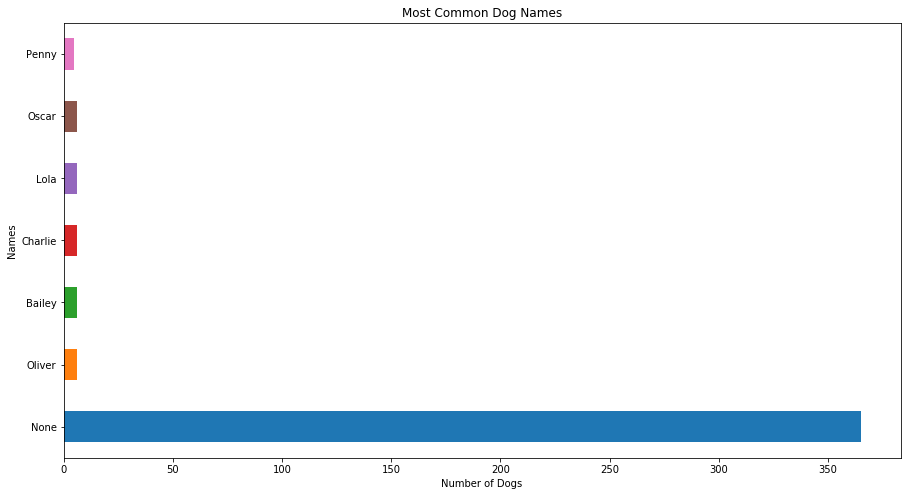

In [83]:
df_clean.name.value_counts()[0:7].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs")
plt.ylabel('Names')

>Insight 2;Analyzing and Visualizing the most retweeted dog breed


Bo and Lola are the most popular names.

In [84]:
from IPython.display import Image

### Most Retweeted Dog and its predicted breed

In [85]:
dog = ['name','text','jpg_url','p1','p2','p3','retweet_count']

In [86]:
df_new =  pd.DataFrame(df_clean[dog])

In [87]:
df_new['retweet_count']=df_new['retweet_count'].astype('int')

In [88]:
df_new

name                                               text  \
0       Phineas  This is Phineas. He's a mystical boy. Only eve...   
1         Tilly  This is Tilly. She's just checking pup on you....   
2        Archie  This is Archie. He is a rare Norwegian Pouncin...   
3         Darla  This is Darla. She commenced a snooze mid meal...   
4      Franklin  This is Franklin. He would like you to stop ca...   
5          None  Here we have a majestic great white breaching ...   
9        Cassie  This is Cassie. She is a college pup. Studying...   
10         Koda  This is Koda. He is a South Australian decksha...   
11        Bruno  This is Bruno. He is a service shark. Only get...   
12         None  Here's a puppo that seems to be on the fence a...   
13          Ted  This is Ted. He does his best. Sometimes that'...   
14       Stuart  This is Stuart. He's sporting his favorite fan...   
15       Oliver  This is Oliver. You're witnessing one of his m...   
16          Jim  This is Jim. He found a fren. Taught him how t...   
20       Gerald  This is Gerald. He was just told he didn't get...   
23       Canela  This is Canela. She attempted some fancy porch...   
24         None  You may not have known you needed to see this ...   
26         Maya  This is Maya. She's very shy. Rarely leaves he...   
27       Mingus  This is Mingus. He's a wonderful father to his...   
28        Derek  This is Derek. He's late for a dog meeting. 13...   
31      Waffles  This is Waffles. His doggles are pupside down....   
35         None  I have a new hero and his name is Howard. 14/1...   
37         None  Here we have a corgi undercover as a malamute....   
38         Earl  This is Earl. He found a hat. Nervous about wh...   
39         Lola  This is Lola. It's her first time outside. Mus...   
40        Kevin  This is Kevin. He's just so happy. 13/10 what ...   
41         None  I present to you, Pup in Hat. Pup in Hat is gr...   
42         None  OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...   
44         Noah  This is Noah. He can't believe someone made th...   
46    Grizzwald  Meet Grizzwald. He may be the floofiest floofe...   
...         ...                                                ...   
2033       None  Very fit horned dog here. Looks powerful. Not ...   
2034       None  This is a Tuscaloosa Alcatraz named Jacob (Yac...   
2035      Oscar  This is Oscar. He's ready for Christmas. 11/10...   
2036       None  I'm just going to leave this one here as well....   
2037       None  This is the best thing I've ever seen so sprea...   
2039     Marley  This is Marley. She chews shoes then feels ext...   
2040       None  Interesting dog here. Very large. Purple. Mani...   
2042     Baxter  This is Baxter. He's very calm. Hasn't eaten i...   
2043   Reginald  This is Reginald. He's pondering what life wou...   
2045        Jax  Meet Jax. He's in the middle of a serious conv...   
2047  Scruffers  This is Scruffers. He's being violated on mult...   
2049    Charlie  This is Charlie. He was just informed that dog...   
2051     Julius  This is Julius. He's a cool dog. Carries seash...   
2053   Penelope  Meet Penelope. She is a white Macadamias Duode...   
2054       None  Striped dog here. Having fun playing on back. ...   
2055     Tanner  This is Tanner. He accidentally dropped all hi...   
2056       None  Tfw she says hello from the other side. 9/10 h...   
2057        Lou  This is Lou. He's a Petrarch Sunni Pinto. Well...   
2058       Lola  This is Lola. She was not fully prepared for t...   
2059     Sparky  This is Sparky. That's his pancake now. He wil...   
2060       None  This pup holds the secrets of the universe in ...   
2061       Herm  This is Herm. It's his first day of potty trai...   
2062       None  Pack of horned dogs here. Very team-oriented b...   
2064      Holly  Meet Holly. She's trying to teach small human-...   
2065       None  *struggling to breathe properly* 12/10 https:/...   
2066       None  This

In [89]:
df_new.nlargest(n=5,columns=['retweet_count'])

name                                               text  \
1011   Linus  This is Linus. He just wanted to say hello but...   
1051    None  For anyone who's wondering, this is what happe...   
65    Bailey  This is Bailey. He thinks you should measure e...   
428     Luca  This is Luca. He got caught howling. H*ckin em...   
129   Shikha  This is Shikha. She just watched you drop a sk...   

                                              jpg_url  \
1011  https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg   
1051  https://pbs.twimg.com/media/CehZ9mLWsAAsn28.jpg   
65    https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg   
428   https://pbs.twimg.com/media/CVt2PawWIAEUkqW.jpg   
129   https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg   

                              p1              p2                         p3  \
1011                 maltese_dog  dandie_dinmont            norfolk_terrier   
1051              siberian_husky      eskimo_dog                   malamute   
65                    toy_poodle       chihuahua                   bluetick   
428   greater_swiss_mountain_dog           boxer  staffordshire_bullterrier   
129             golden_retriever          basset                   cardigan   

      retweet_count  
1011          70563  
1051          52793  
65            37367  
428           34498  
129           30136

In [90]:
Image(url='https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg')

### THE MOST POPULAR DOG BREED

In [91]:

dog_breed= df_clean['p1']

In [92]:
dog_breed.value_counts()


golden_retriever                  115
pembroke                           69
labrador_retriever                 69
chihuahua                          49
pug                                38
toy_poodle                         26
samoyed                            24
chow                               24
pomeranian                         24
miniature_pinscher                 21
cocker_spaniel                     21
malamute                           21
french_bulldog                     18
beagle                             17
cardigan                           16
staffordshire_bullterrier          16
siberian_husky                     15
german_shepherd                    15
chesapeake_bay_retriever           14
eskimo_dog                         13
great_pyrenees                     13
maltese_dog                        12
shih-tzu                           12
american_staffordshire_terrier     12
border_collie                      12
rottweiler                         12
lakeland_ter

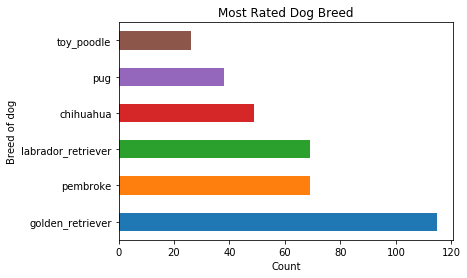

In [93]:
dog_breed = df_clean.groupby('p1').filter(lambda x: len(x) >= 25)


dog_breed['p1'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

Based on the analysis and visualiztion , the most popular dog breed is golden retriever